<a href="https://colab.research.google.com/github/hitomitsu50/Sports_data_portfolio_MLB_Statcast/blob/main/2025%E5%B9%B4Statcast%EF%BE%8A%EF%BE%9E%EF%BE%9A%EF%BE%99%E7%8E%87TOP10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#ライブラリのインストール
!pip install pybaseball japanize_matplotlib
!sudo apt-get -y upadate
!sudo apt-get -y install fonts-ipaexfont

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 32.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 426.1/426.1 kB 32.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 432.7/432.7 kB 32.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 65.3 MB/s eta 0:00:00
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=c4e524b48fd523eb29e7dd8b0e1654b2a2a4dabe82230f96c29f4402e40a320b
  Stored in directory: /root/.cache/pip/wheels/c1/f7/9b/418f19a7b9340fc16e071e89efc379aca68d40238b258df53d
Successfully built japanize_matplotlib
E: Invalid operation upadate
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-ipaexfont-gothic fonts-ipaexfont-mincho
The following NEW packages will be installed:
  fonts-ipaexfont fonts-ipaexfont-gothic fon

In [2]:
#ライブラリのインポート
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import japanize_matplotlib
import time
import glob
from pybaseball import statcast

In [6]:
#データの読み込みと結合
#ファイル名パターンに一致するＣＳＶを取得
csv_files_pattern="sample_data/statcast_*.csv"
csv_files=glob.glob(csv_files_pattern)

In [7]:
#各ＣＳＶファイルを読み込み
dfs=[]
for file in csv_files:
  try:
    df_month=pd.read_csv(file)
    dfs.append(df_month)
    print(f"{file}を読み込みました。")
  except Exception as e:
    print(f"{file}の読み込み中にエラーが発生:{e}")


sample_data/statcast_2025-07-01-2025-07-31.csvを読み込みました。
sample_data/statcast_2025-08-01-2025-08-31.csvを読み込みました。
sample_data/statcast_2025-05-01-2025-05-31.csvを読み込みました。
sample_data/statcast_2025-06-01-2025-06-30.csvを読み込みました。
sample_data/statcast_2025-04-01-2025-04-30.csvを読み込みました。
sample_data/statcast_2025-03-18-2025-03-31.csvを読み込みました。
sample_data/statcast_2025-09-01-2025-09-28.csvを読み込みました。


In [8]:
#全てのファイルの結合
if dfs:
  df_combined=pd.concat(dfs,ignore_index=True)
  df=df_combined
  print("全てのデータを結合しました。")
  display(df.head())
  print(f"結合後の行数: {len(df)}")
else:
  print("読み込めるＣＳＶファイルが見つかりませんでした。")

全てのデータを結合しました。


,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,batter_days_until_next_game,api_break_z_with_gravity,api_break_x_arm,api_break_x_batter_in,arm_angle,attack_angle,attack_direction,swing_path_tilt,intercept_ball_minus_batter_pos_x_inches,intercept_ball_minus_batter_pos_y_inches
0,FF,2025-07-31,94.9,-1.51,5.49,"Iglesias, Raisel",666158,628452,field_out,hit_into_play,...,1.0,1.03,0.80,-0.80,33.4,14.625621,5.139658,26.105401,39.877731,29.346793
1,CH,2025-07-31,88.6,-1.83,5.27,"Iglesias, Raisel",666158,628452,NaN,foul,...,1.0,2.09,1.07,-1.07,27.5,24.633351,-10.604571,30.797530,36.951177,47.111399
2,FF,2025-07-31,96.4,-2.57,4.90,"Iglesias, Raisel",668715,628452,strikeout,swinging_strike,...,1.0,1.21,1.09,1.09,22.3,-10.379971,49.317661,30.875973,29.386007,10.276153
3,FF,2025-07-31,95.7,-1.49,5.55,"Iglesias, Raisel",668715,628452,NaN,called_strike,...,1.0,1.14,0.67,0.67,35.6,NaN,NaN,NaN,NaN,NaN
4,FF,2025-07-31,93.0,-2.06,5.11,"Iglesias, Raisel",668715,628452,NaN,called_strike,...,1.0,1.47,0.92,0.92,23.6,NaN,NaN,NaN,NaN,NaN


結合後の行数: 742080


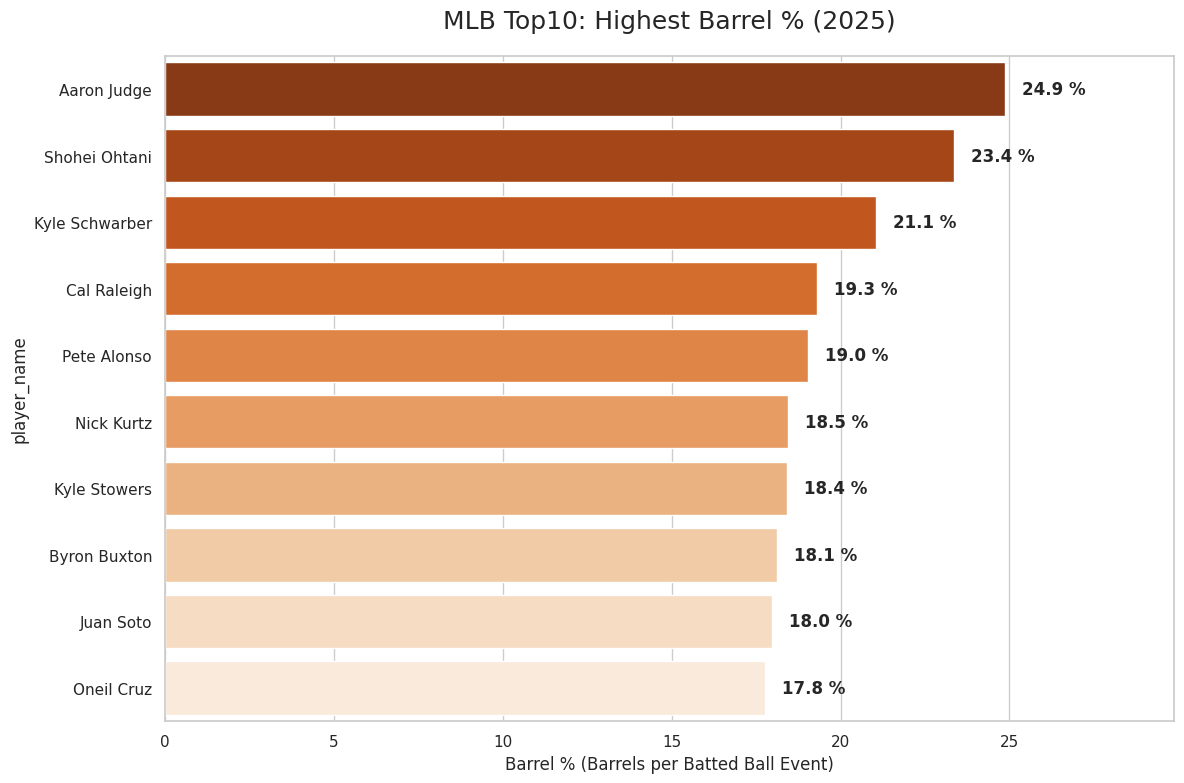

In [10]:
# --- 1. バレルの判定 ---
# 打球データがある行のみ抽出し バレル（６）を判定
df_bat=df.dropna(subset=["launch_speed_angle"]).copy()
df_bat["is_barrel"]=(df_bat["launch_speed_angle"]==6).astype(int)

# --- 2. 打者ID(batter)ごとの集計
#player_nameではなく、一意のＩＤである、"batter"でグループ化します。
batter_stats=df_bat.groupby("batter").agg(
    Barrel_Rate=("is_barrel","mean"),
    BBE=("is_barrel", "count"),
    raw_des=("des", "first") #名前をむき出すためのプレー説明文
).reset_index()

#単位をパーセントに変換
batter_stats["Barrel_Rate"]=batter_stats["Barrel_Rate"]*100

# --- 3. 200打球以上の強打者に絞る ---
top_10_barrel=batter_stats[batter_stats["BBE"]>=200].sort_values(by="Barrel_Rate",
                                                                 ascending=False).head(10)

# --- 4. 名前を打者名に変換 ---
#説明文(des)の先頭から打者名を抽出する関数
def get_batter_name(row):
  name_parts=str(row["raw_des"]).split()[:2]
  return " ".join(name_parts)
#ID集計した結果に 打者名（名 姓）の列を形成
top_10_barrel["player_name"]=top_10_barrel.apply(get_batter_name, axis=1)

# --- 5. 可視化(右側に数値と%を表示) ---
plt.figure(figsize=(12,8))
sns.set_theme(style="whitegrid")
plot=sns.barplot(data=top_10_barrel, x="Barrel_Rate", y="player_name",
                 hue="player_name",palette="Oranges_r",legend=False)

# 右側に数値を太字で表示
for p in plot.patches:
  width= p.get_width()
  plot.text(width + 0.5, p.get_y() + p.get_height()/2, f"{width:.1f} %",
            va="center", fontweight="bold",fontsize=12)

# --- 6. 可視化 ---
plt.title("MLB Top10: Highest Barrel % (2025)", fontsize=18, pad=20)
plt.xlabel("Barrel % (Barrels per Batted Ball Event)")
plt.xlim(0, max(top_10_barrel["Barrel_Rate"]) + 5)
plt.tight_layout()
plt.show()